In [1]:
%load_ext autoreload
%autoreload 2

### Base random rolls

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

tst = np.array([random.randint(1,20) for i in range(14*1000000)]).reshape(14,1000000)
bon = np.array([random.randint(1,4) for i in range(14*1000000)]).reshape(14,1000000)
bon = bon + tst

### Simulate one million battles

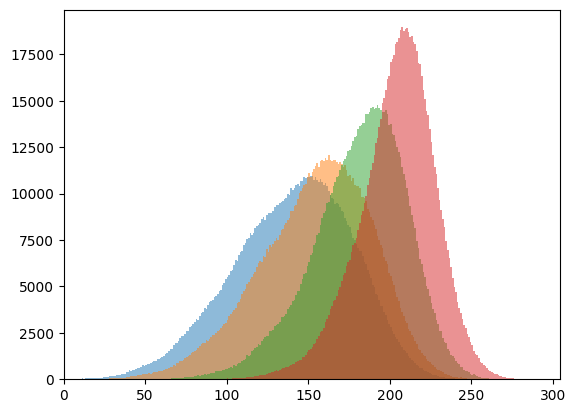

Enemy: Guard   HP: 178   AC: 15   Strength Save: 4
Blue:   Ground and Pound :    Max 262, Min 0, Ave 139
15.123% Percent chance of killing enemy in first turn
Orange: Hill GS          :  Max 275, Min 0, Ave 154
26.445% Percent chance of killing enemy in first turn
Green:  Stone GS         :  Max 280, Min 17, Ave 180
58.550% Percent chance of killing enemy in first turn
Red:    Frost GS         :   Max 304, Min 39, Ave 203
86.704% Percent chance of killing enemy in first turn


In [3]:
import hit as h

#Stats
enemyName = 'Guard'
enemyAC = 15
enemyStrSave = 4
enemyhp = 178
toHit = 10
toDamage = 6
dc = 16

# Process Attacks
ht = np.array([h.gapturn(tst[:,i], enemyAC, enemyStrSave, toHit, toDamage, dc) for i in range(1000000)])
he = np.array([h.gapturn(tst[:,i], enemyAC, enemyStrSave, toHit+1, toDamage+1, dc+1) for i in range(1000000)])
hs = np.array([h.gapturn(tst[:,i], enemyAC, enemyStrSave, toHit+3, toDamage+3, dc+3) for i in range(1000000)])
hb = np.array([h.gapturn(tst[:,i], enemyAC, enemyStrSave, toHit+5, toDamage +5, dc+5) for i in range(1000000)])

# Append results to dataset
#ht = np.expand_dims(ht, axis=0)
#tst = np.append(tst,ht, axis = 0)

plt.hist(ht, bins=ht.max() - ht.min(), alpha = .5)
plt.hist(he, bins=he.max() - he.min(), alpha = .5)
plt.hist(hs, bins=hs.max() - hs.min(), alpha = .5)
plt.hist(hb, bins=hb.max() - hb.min(), alpha = .5)
plt.xlim((ht.min(),hb.max()))
plt.show()
print('Enemy: %s   HP: %d   AC: %d   Strength Save: %d' % (enemyName, enemyhp, enemyAC, enemyStrSave))
print('Blue:   Ground and Pound :  Max %d, Min %d, Ave %d' % (ht.max(), ht.min(), ht.mean()))
print("%.3f%% Percent chance of killing enemy in first turn" % (100 * np.count_nonzero(ht >= enemyhp)/1000000))
print('Orange: Hill GS          :  Max %d, Min %d, Ave %d' % (he.max(), he.min(), he.mean()))
print("%.3f%% Percent chance of killing enemy in first turn" % (100 * np.count_nonzero(he >= enemyhp)/1000000))
print('Green:  Stone GS         :  Max %d, Min %d, Ave %d' % (hs.max(), hs.min(), hs.mean()))
print("%.3f%% Percent chance of killing enemy in first turn" % (100 * np.count_nonzero(hs >= enemyhp)/1000000))
print('Red:    Frost GS         :  Max %d, Min %d, Ave %d' % (hb.max(), hb.min(), hb.mean()))
print("%.3f%% Percent chance of killing enemy in first turn" % (100 * np.count_nonzero(hb >= enemyhp)/1000000))